   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


2024-06-27 06:23:30.906695: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-27 06:23:30.906800: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-27 06:23:31.066761: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 12813 images belonging to 10 classes.
Found 3198 images belonging to 10 classes.
94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/75
  1/401 [..............................] - ETA: 53:04 - loss: 4.3317 - accuracy: 0.0625

I0000 00:00:1719469441.152919      92 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


401/401 [==============================] - 114s 264ms/step - loss: 2.1624 - accuracy: 0.8691 - val_loss: 1.5375 - val_accuracy: 0.9174
Epoch 2/75
401/401 [==============================] - 51s 127ms/step - loss: 0.5900 - accuracy: 0.9621 - val_loss: 0.9951 - val_accuracy: 0.9525
Epoch 3/75
401/401 [==============================] - 52s 129ms/step - loss: 0.4070 - accuracy: 0.9743 - val_loss: 1.1817 - val_accuracy: 0.9522
Epoch 4/75
401/401 [==============================] - 52s 130ms/step - loss: 0.3919 - accuracy: 0.9789 - val_loss: 1.2777 - val_accuracy: 0.9506
Epoch 5/75
401/401 [==============================] - 53s 131ms/step - loss: 0.2927 - accuracy: 0.9846 - val_loss: 1.7136 - val_accuracy: 0.9465
Epoch 6/75
401/401 [==============================] - 55s 136ms/step - loss: 0.2598 - accuracy: 0.9872 - val_loss: 1.2432 - val_accuracy: 0.9593
Epoch 7/75
401/401 [==============================] - 54s 134ms/step - loss: 0.3812 - accuracy: 0.9842 - val_loss: 1.8852 - val_accuracy: 0.

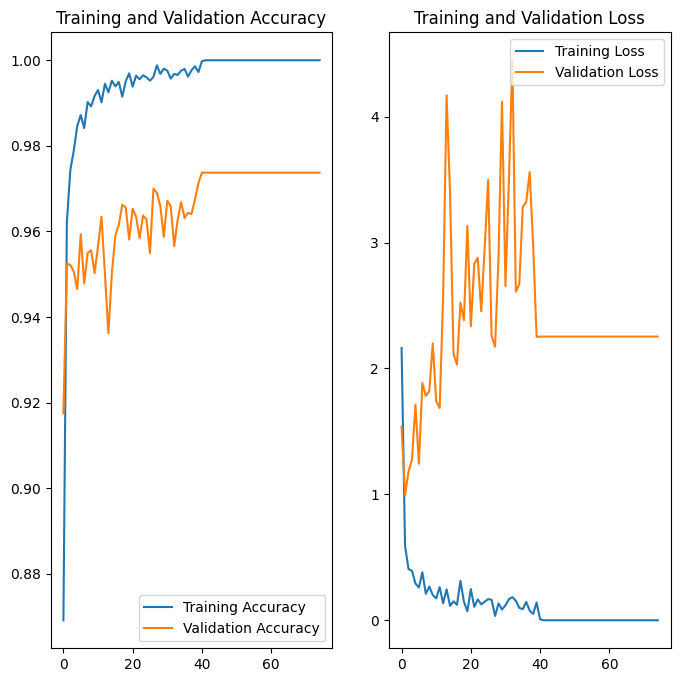

1/1 [==============================] - 1s 924ms/step


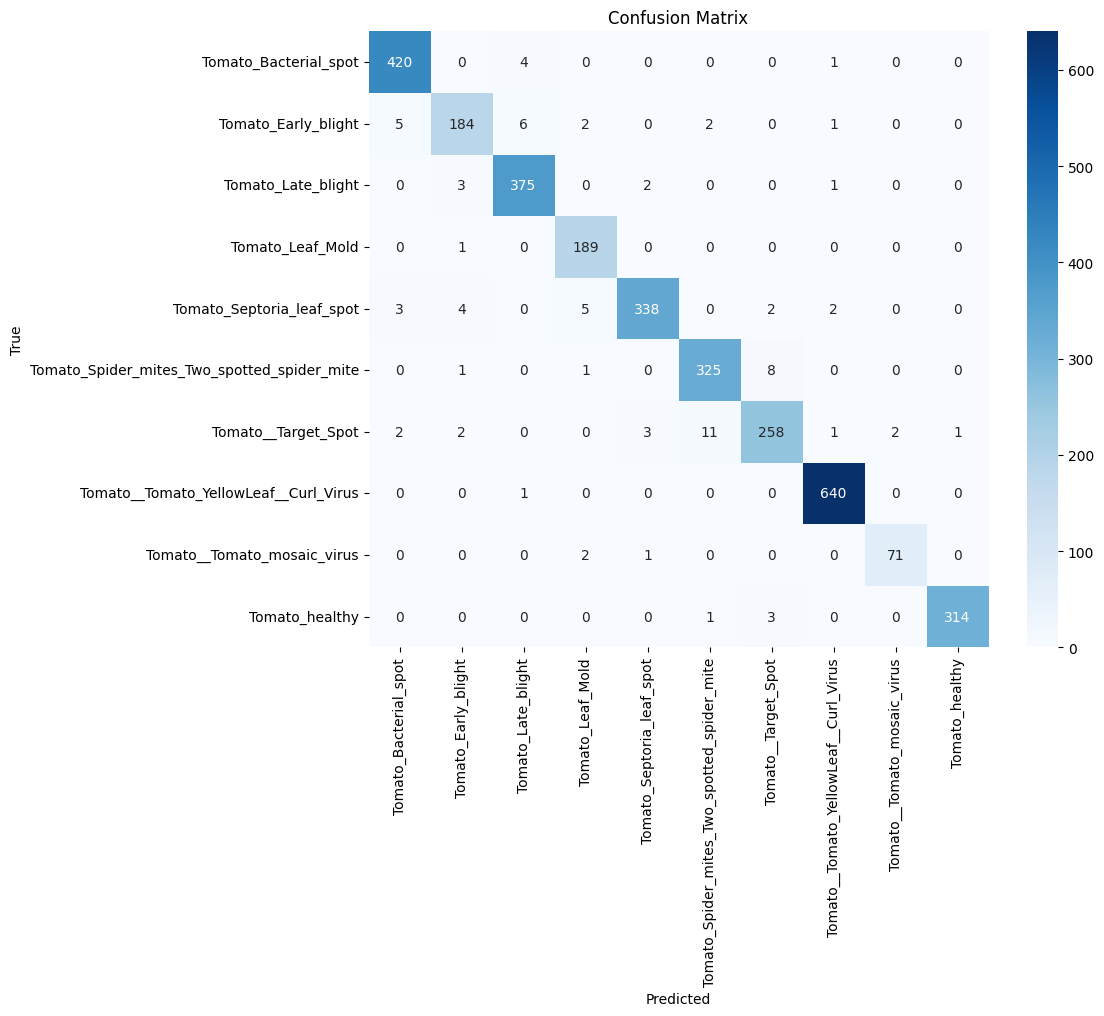

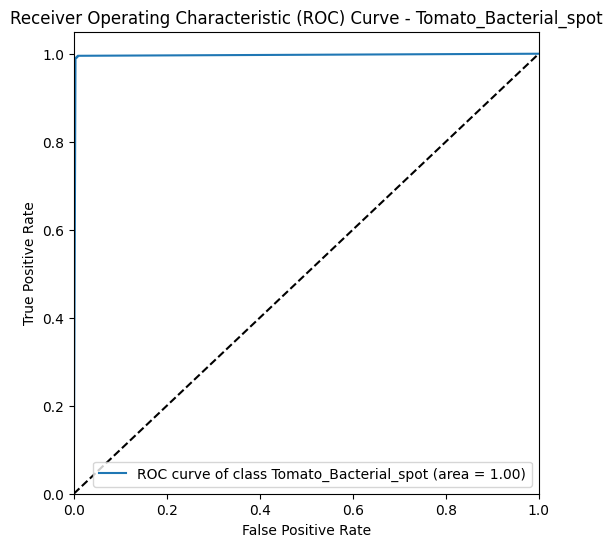

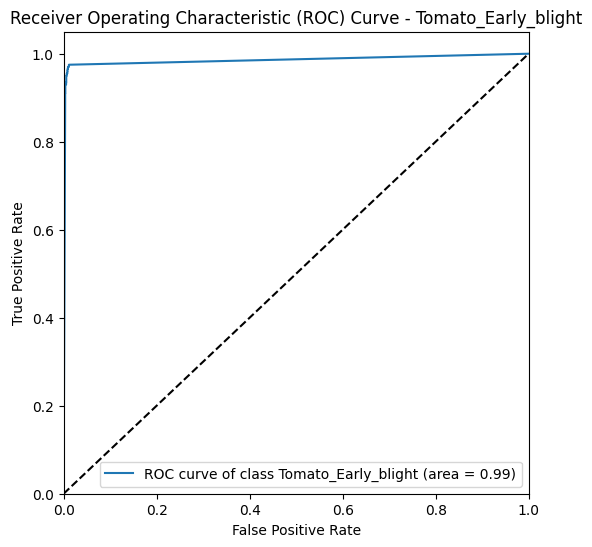

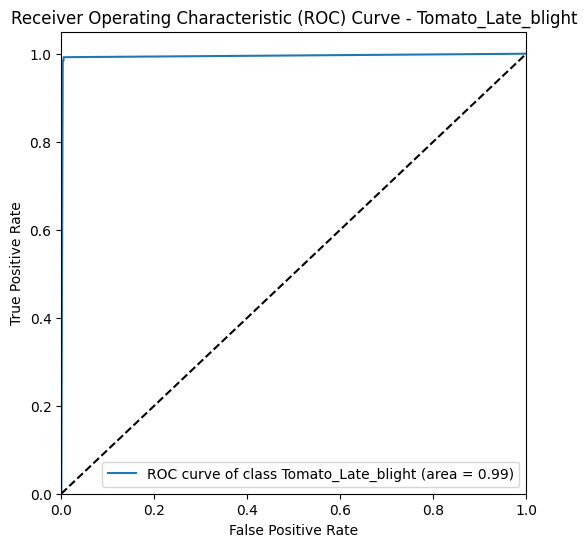

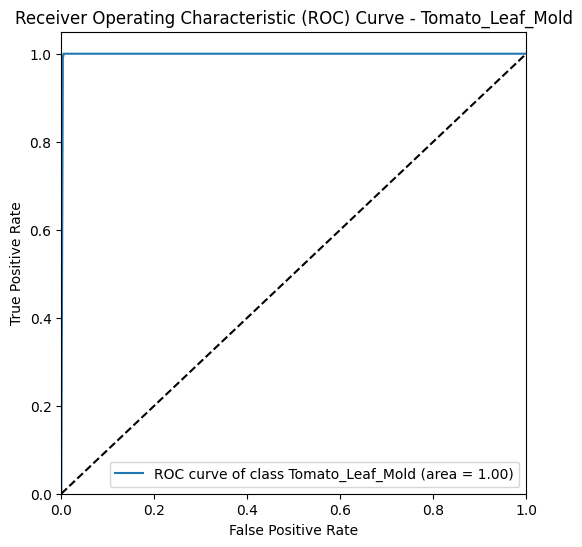

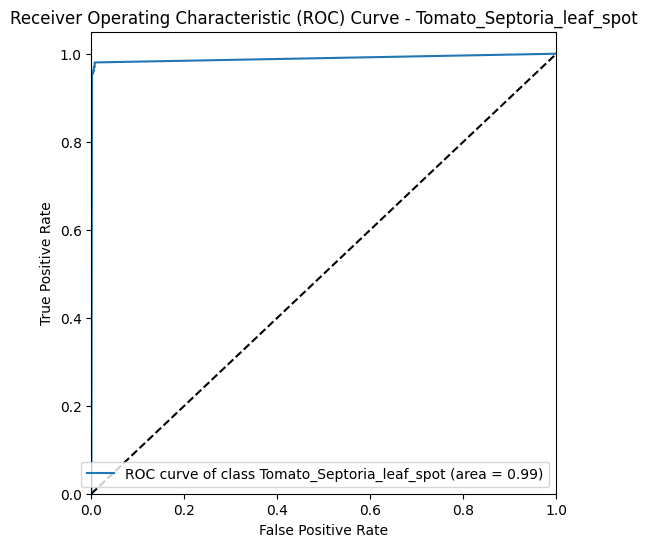

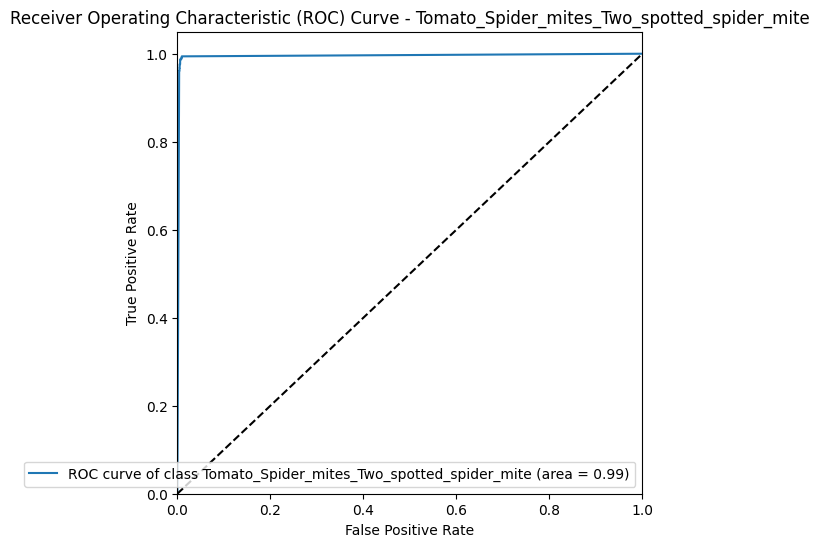

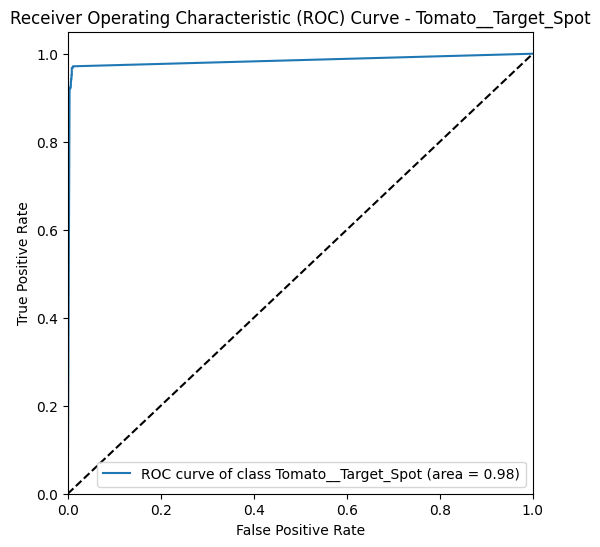

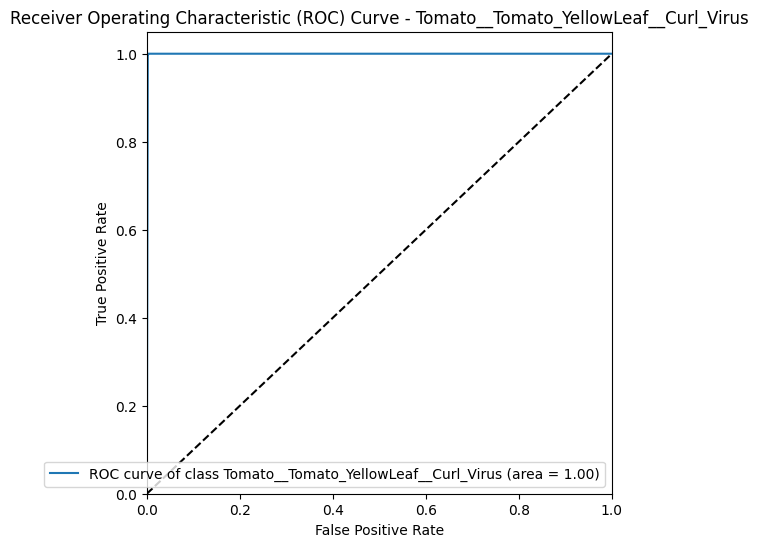

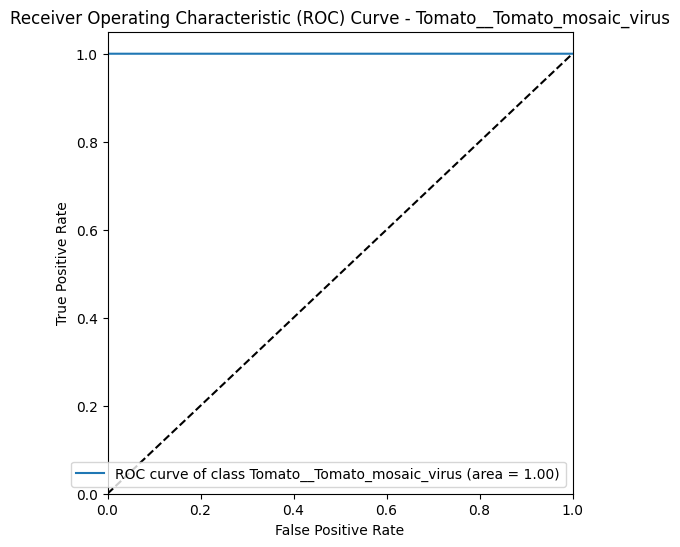

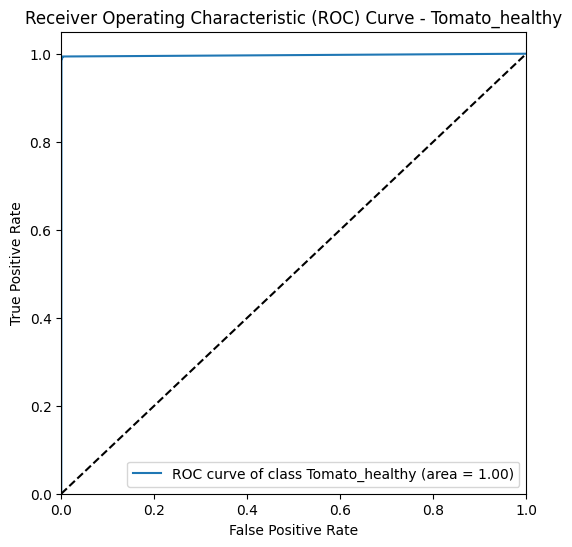

Results for ResNet50:
  Validation Accuracy: 0.9737
  Precision: 0.9737
  Recall: 0.9737
  F1 Score: 0.9736
  Average AUC: 0.9937
  Training Time: 4055.61 seconds
Found 16011 images belonging to 10 classes.
1/1 [==============================] - 0s 24ms/step


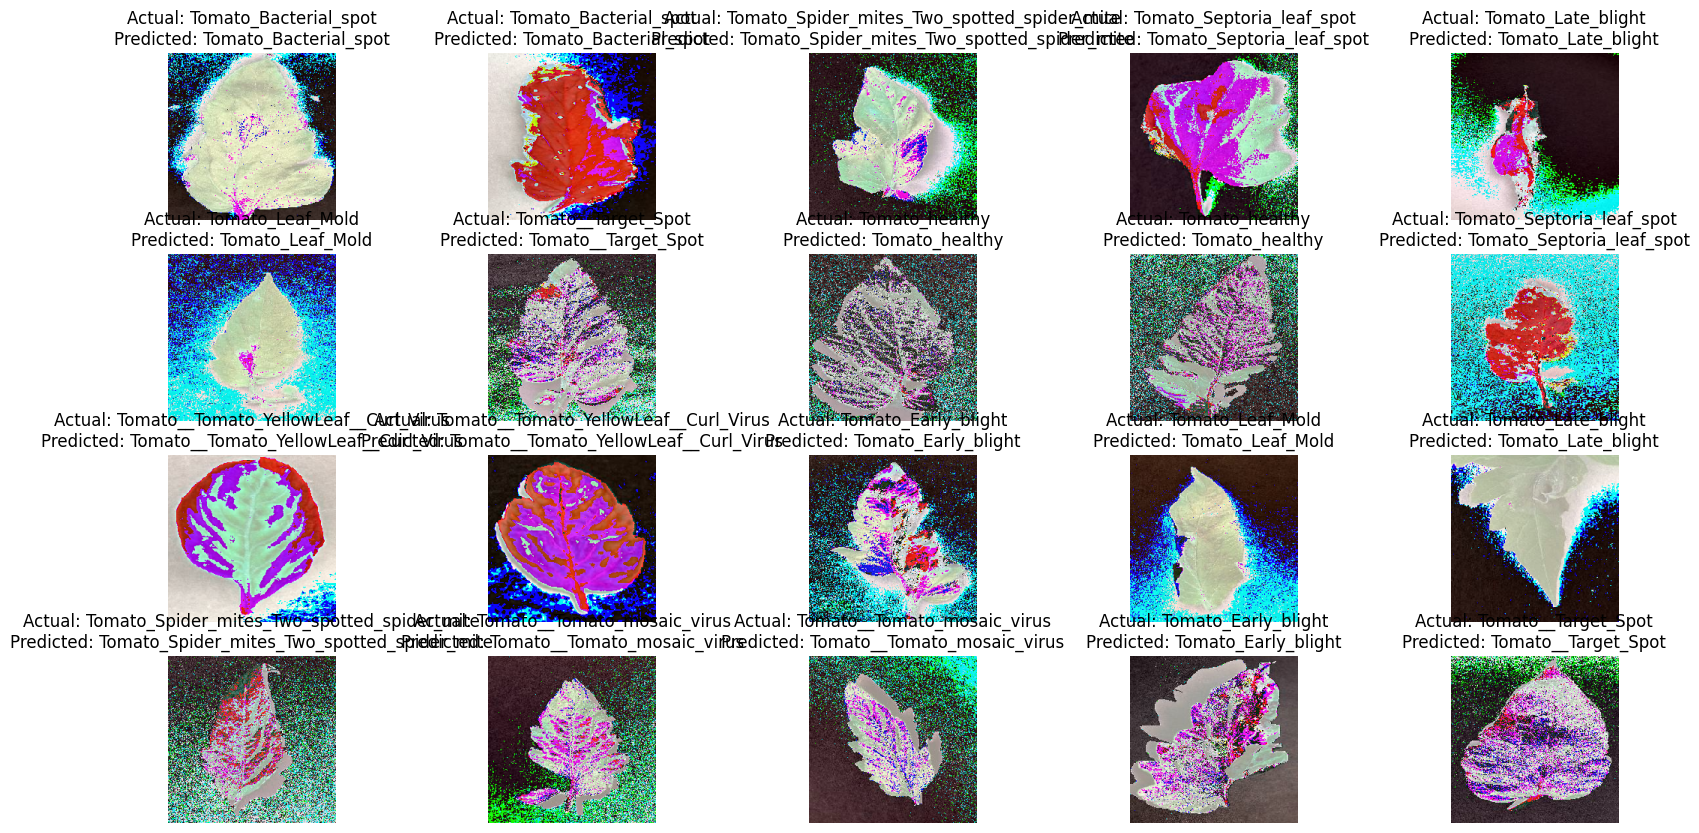

In [1]:
# Install necessary libraries
!pip install tensorflow

# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import time
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define all hyperparameters
BATCH_SIZE = 32
IMAGE_SIZE = 224
EPOCHS = 75
CLASS_NAMES = [
    'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 
    'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 
    'Tomato_Spider_mites_Two_spotted_spider_mite', 
    'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 
    'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'
]

# Load dataset
dataset_dir = "/kaggle/input/plantdisease/PlantVillage"

# Create ImageDataGenerator
image_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    validation_split=0.2
)

# Load training and validation data
train_gen = image_gen.flow_from_directory(
    dataset_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    classes=CLASS_NAMES
)

val_gen = image_gen.flow_from_directory(
    dataset_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    classes=CLASS_NAMES
)

# Function to create and compile the model
def create_model():
    base_model = ResNet50(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), weights='imagenet', include_top=False)
    for layer in base_model.layers:
        layer.trainable = False

    x = Flatten()(base_model.output)
    prediction = Dense(len(CLASS_NAMES), activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=prediction)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and compile the model
model = create_model()

# Train the model
start_time = time.time()
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    verbose=1
)
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Save the model weights
model.save_weights('/kaggle/working/resnet50_model_weights.weights.h5')

# Plot accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model
val_steps = val_gen.samples // BATCH_SIZE + (1 if val_gen.samples % BATCH_SIZE != 0 else 0)
scores = model.evaluate(val_gen, steps=val_steps, verbose=1)
val_accuracy = scores[1]

# Get predictions and labels
y_pred = []
y_true = []
y_pred_prob = []

for i in range(val_steps):
    images, labels = next(val_gen)
    y_true.extend(np.argmax(labels, axis=1))  # Ensure labels are in the correct format
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_pred_prob.extend(predictions)

y_pred_prob = np.array(y_pred_prob)

# Compute metrics
cm = confusion_matrix(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(CLASS_NAMES)):
    fpr[i], tpr[i], _ = roc_curve(np.array(y_true) == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
average_auc = np.mean(list(roc_auc.values()))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curves for each class
for i in range(len(CLASS_NAMES)):
    plt.figure(figsize=(6, 6))
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {CLASS_NAMES[i]} (area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {CLASS_NAMES[i]}')
    plt.legend(loc='lower right')
    plt.show()

# Display results
print(f"Results for ResNet50:")
print(f"  Validation Accuracy: {val_accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  Average AUC: {average_auc:.4f}")
print(f"  Training Time: {training_time:.2f} seconds")

# Load test data for prediction
test_gen = image_gen.flow_from_directory(
    dataset_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=1,
    class_mode='categorical',
    shuffle=True,
    classes=CLASS_NAMES
)

# Select 20 images (2 from each class) for prediction
test_images = []
test_labels = []
num_images_per_class = 2
class_counts = {cls: 0 for cls in CLASS_NAMES}
total_selected = 0

while total_selected < 20:
    images, labels = next(test_gen)
    label = np.argmax(labels[0])
    class_name = CLASS_NAMES[label]
    if class_counts[class_name] < num_images_per_class:
        test_images.append(images[0])
        test_labels.append(label)
        class_counts[class_name] += 1
        total_selected += 1

# Predict and display results for the selected images
plt.figure(figsize=(20, 10))
for i, image in enumerate(test_images):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image.astype("uint8"))
    actual_label = CLASS_NAMES[test_labels[i]]
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_label = CLASS_NAMES[np.argmax(prediction)]
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    plt.axis('off')
plt.show()
